# Saving and Loading Models

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

## Full Network Example

Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

### Artifical Data (Some Made Up Regression Data)

In [3]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [4]:
x_data

array([0.04919588, 1.32311387, 0.8076449 , 2.3478983 , 5.00027539,
       6.55724614, 6.08756533, 8.95861702, 9.55352047, 9.06981686])

In [5]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

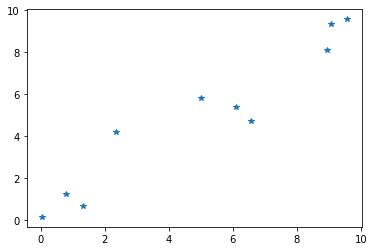

In [6]:
plt.plot(x_data,y_label,'*')

** Variables **

In [7]:
np.random.rand(2)

array([0.68530633, 0.51786747])

In [8]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)

### Cost Function

In [9]:
error = tf.reduce_mean(y_label - (m*x_data+b))

### Optimizer

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### Initialize Variables

In [11]:
init = tf.global_variables_initializer()

__________
_____________
________

# Saving The Model

In [12]:
saver = tf.train.Saver()

### Create Session and Run!

In [13]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])
    
    # ONCE YOU ARE DONE
    # GO AHEAD AND SAVE IT!
    # Make sure to provide a directory for it to make or go to. May get errors otherwise
    #saver.save(sess,'models/my_first_model.ckpt')
    saver.save(sess,'new_models/my_second_model.ckpt')

### Evaluate Results

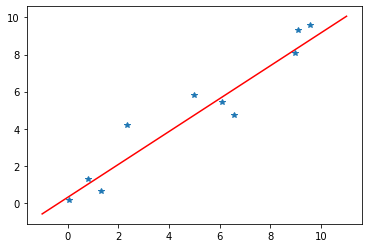

In [14]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

# Loading a Model

In [15]:
with tf.Session() as sess:
    
    # Restore the model
    saver.restore(sess,'new_models/my_second_model.ckpt')
    

    # Fetch Back Results
    restored_slope , restored_intercept = sess.run([m,b])

INFO:tensorflow:Restoring parameters from new_models/my_second_model.ckpt


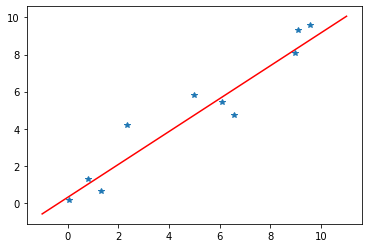

In [16]:
x_test = np.linspace(-1,11,10)
y_pred_plot = restored_slope*x_test + restored_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')